In [1]:
from netCDF4 import Dataset
import numpy as np

In [2]:
predictor2file = {'airTemp':'tas.nc', 'precip':'pr.nc', 'downwardLongwave':'rlns.nc', \
                  'downwardShortwave':'rsds.nc', 'plantAvailableWater':'paw.nc'}
# where is relative humidity?
predictors = {k:Dataset(v)['var1'][...].squeeze() for k,v in predictor2file.items()}
targetFile = 'jedi_output.nc'
targetVariable = 'NPP'
target = Dataset( targetFile)[targetVariable][...].squeeze()
landSeaMask = Dataset('landsea.nc')['var1'][...].squeeze()

# an example of making annual means
precip = predictors['precip']
annualMeanPrecip = precip.reshape((-1, 12, precip.shape[1], precip.shape[2])).mean( axis=1)

In [3]:
airTemp = 'tas.nc'
netLongRadiantionFlux = 'rlns.nc'
shortwaveRadiation = 'rsds.nc'
precipitation = 'pr.nc'
output = 'jedi_output.nc'

landSeaMask = 'landsea.nc'
lantitude =  'latitude.nc'
longitude = 'longitude.nc'
elevation = 'elevation.nc'
moisture = 'paw.nc'
spatialMetaData = 'globe_surf.nc'

airTempDataset = Dataset(airTemp)
netLongRadiantionFluxDataSet = Dataset(netLongRadiantionFlux)
shortwaveRadiationDataset = Dataset(shortwaveRadiation)
precipitationDataSet = Dataset(precipitation)
outputDataset = Dataset(output)

landSeaMaskDataset = Dataset(landSeaMask)
lantitudeDataset = Dataset(lantitude)
longitudeDataset = Dataset(longitude)
elevationDataset = Dataset(elevation)
moistureDataset = Dataset(moisture)
spatialMetaDataset = Dataset(spatialMetaData)

airTempArray = airTempDataset['var1'][:].squeeze()
netLongRadiantionFluxArray = netLongRadiantionFluxDataSet['var1'][:].squeeze()
shortwaveRadiationArray = shortwaveRadiationDataset['var1'][:].squeeze()
precipitationArray = precipitationDataSet['var1'][:].squeeze()
NPPArray = outputDataset['NPP'][:].squeeze()
landSeaMaskArray = landSeaMaskDataset['var1'][:].squeeze()
lantitudeArray = lantitudeDataset['var1'][:].squeeze()
longitudeArray = longitudeDataset['var1'][:].squeeze()
elevationArray = elevationDataset['var1'][:].squeeze()
moistureArray = moistureDataset['var1'][:].squeeze()
spatialMetaDataArray = spatialMetaData[:]



In [4]:
print('airTempArray'+str(np.shape(airTempArray)))
print('netLongRadiantionFluxArray'+str(np.shape(netLongRadiantionFluxArray)))
print('shortwaveRadiationArray'+str(np.shape(shortwaveRadiationArray)))
print('precipitationArray'+str(np.shape(precipitationArray)))
print('NPPArray'+str(np.shape(NPPArray)))
print('landSeaMaskArray'+str(np.shape(landSeaMaskArray)))
print('lantitudeArray'+str(np.shape(lantitudeArray)))
print('longitudeArray'+str(np.shape(longitudeArray)))
print('elevationArray'+str(np.shape(elevationArray)))
print('moistureArray'+str(np.shape(moistureArray)))
print('spatialMetaDataArray'+str(np.shape(spatialMetaDataArray)))

airTempArray(288, 51, 60)
netLongRadiantionFluxArray(288, 51, 60)
shortwaveRadiationArray(288, 51, 60)
precipitationArray(288, 51, 60)
NPPArray(288, 51, 60)
landSeaMaskArray(51, 60)
lantitudeArray(51, 60)
longitudeArray(51, 60)
elevationArray(51, 60)
moistureArray(51, 60)
spatialMetaDataArray()


In [5]:
####对于static data 的处理
import pandas as pd
landSeaMaskArray_flatten = landSeaMaskArray.reshape(51*60)
lantitudeArray_flatten = lantitudeArray.reshape(51*60)
longitudeArray_flatten = longitudeArray.reshape(51*60)
elevationArray_flatten = elevationArray.reshape(51*60)
moistureArray_flatten = moistureArray.reshape(51*60)
geo_attri_multi = np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten))).repeat(repeats=5,axis=0)
geo_attri = np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten)))
static_data = pd.DataFrame(geo_attri_multi)
static_data_non_multi = pd.DataFrame(geo_attri)
static_data = static_data.rename(columns={0: 'landSea', 1: 'lantitude', 2: 'longitude', 3: 'elevation', 4: 'moisture'})
static_data_non_multi= static_data_non_multi.rename(columns={0: 'landSea', 1: 'lantitude', 2: 'longitude', 3: 'elevation', 4: 'moisture'})


In [6]:
pd.DataFrame(np.array(list(zip(landSeaMaskArray_flatten,lantitudeArray_flatten,longitudeArray_flatten,elevationArray_flatten,moistureArray_flatten))))

,0,1,2,3,4
0,0.0,5.25,-79.75,-3287.0,0.105
1,0.0,5.25,-79.25,-3317.0,0.105
2,0.0,5.25,-78.75,-3091.0,0.105
3,0.0,5.25,-78.25,-3470.0,0.105
4,0.0,5.25,-77.75,-1985.0,0.105
...,...,...,...,...,...
3055,1.0,-19.75,-52.25,370.0,0.060
3056,1.0,-19.75,-51.75,494.0,0.060
3057,1.0,-19.75,-51.25,423.0,0.060
3058,1.0,-19.75,-50.75,391.0,0.075


In [7]:
len(NPPArray_flatten.filled(fill_value=0))


NameError: name 'NPPArray_flatten' is not defined

In [8]:
NPPArray.reshape(288*51*60).filled()

array([-9.000000e+33, -9.000000e+33, -9.000000e+33, ...,  3.815418e+00,
        4.009297e+00,  4.009297e+00], dtype=float32)

In [16]:
###对于time series data 的处理
airTempArray_flatten= airTempArray.filled().reshape(288*51*60)
netLongRadiantionFluxArray_flatten= netLongRadiantionFluxArray.filled().reshape(288*51*60)
shortwaveRadiationArray_flatten= shortwaveRadiationArray.filled().reshape(288*51*60)
precipitationArray_flatten= precipitationArray.filled().reshape(288*51*60)
NPPArray_flatten= NPPArray.filled().reshape(288*51*60)
# geo_data = np.array(list(zip(airTempArray_flatten,netLongRadiantionFluxArray_flatten,shortwaveRadiationArray_flatten,precipitationArray_flatten,NPPArray_flatten))).reshape(288,51*60*5)
# time_series = pd.DataFrame(geo_data).stack().unstack(0)

In [30]:
np.vstack((airTempArray_flatten,netLongRadiantionFluxArray_flatten))

array([[299.44177246, 299.03308105, 299.03308105, ..., 302.10302734,
        302.10302734, 302.10302734],
       [-47.92285156, -41.453125  , -41.453125  , ..., -62.7421875 ,
        -62.7421875 , -62.7421875 ]])

In [26]:
np.array(airTempArray_flatten,netLongRadiantionFluxArray_flatten,shortwaveRadiationArray_flatten,precipitationArray_flatten,NPPArray_flatten).shape

TypeError: array() takes from 1 to 2 positional arguments but 5 were given

In [21]:
pd.DataFrame({"airTempArray_flatten":airTempArray_flatten,"netLongRadiantionFluxArray_flatten":netLongRadiantionFluxArray_flatten,"shortwaveRadiationArray_flatten":shortwaveRadiationArray_flatten,"precipitationArray_flatten":precipitationArray_flatten,"NPPArray_flatten":NPPArray_flatten})

,airTempArray_flatten,netLongRadiantionFluxArray_flatten,shortwaveRadiationArray_flatten,precipitationArray_flatten,NPPArray_flatten
0,299.441772,-47.922852,245.269943,0.000015,-9.000000e+33
1,299.033081,-41.453125,223.502808,0.000026,-9.000000e+33
2,299.033081,-41.453125,223.502808,0.000026,-9.000000e+33
3,299.033081,-41.453125,223.502808,0.000026,-9.000000e+33
4,296.762695,-40.037109,193.015991,0.000032,-9.000000e+33
...,...,...,...,...,...
881275,302.032288,-59.804688,292.776978,0.000049,2.598577e+00
881276,302.041138,-60.171875,293.085175,0.000048,2.853265e+00
881277,302.103027,-62.742188,295.242523,0.000042,3.815418e+00
881278,302.103027,-62.742188,295.242523,0.000042,4.009297e+00


In [8]:
time_series

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,299.441772,299.621918,298.686707,299.172485,3.005939e+02,300.861511,300.654053,300.689850,300.268799,299.935455,...,298.703125,300.162720,301.208069,300.701416,300.734131,300.299530,300.312042,300.087555,299.646790,300.570953
1,-47.922852,-47.375977,-46.934570,-45.581055,-4.865430e+01,-46.201172,-47.810547,-48.041992,-41.854492,-41.691406,...,-33.360352,-41.427734,-42.692383,-40.418945,-40.124023,-42.329102,-36.887695,-38.923828,-39.163086,-42.825195
2,245.269943,254.484833,260.606354,257.055084,2.340258e+02,197.385056,221.810410,254.881668,195.145950,214.027267,...,234.283875,247.658569,223.247070,180.486404,206.152634,225.392441,223.165619,212.025772,202.380325,215.558350
3,0.000015,0.000019,0.000005,0.000011,9.414004e-05,0.000256,0.000120,0.000056,0.000219,0.000131,...,0.000003,0.000040,0.000115,0.000225,0.000186,0.000116,0.000133,0.000153,0.000132,0.000064
5,299.033081,298.468750,297.494385,298.712219,3.000842e+02,300.567017,300.199036,300.121094,299.811218,299.442993,...,297.473816,298.838074,300.608093,300.501221,300.581482,300.041321,299.840637,299.911194,299.572754,300.228210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15295,297.561340,296.657837,296.701965,293.366577,2.929839e+02,290.729492,290.796082,291.669495,294.330078,296.216431,...,298.889709,295.534119,294.315857,292.554626,291.727478,291.485840,296.544495,301.662415,300.805542,302.103027
15296,-44.703125,-50.218750,-34.968750,-55.148438,-5.973438e+01,-41.273438,-31.835938,-53.109375,-47.335938,-45.601562,...,-42.007812,-47.921875,-56.937500,-46.804688,-55.710938,-67.195312,-80.414062,-77.945312,-73.203125,-62.742188
15297,241.482819,260.075012,183.483810,220.049591,2.017787e+02,129.157715,120.446930,180.875443,202.098740,234.257217,...,230.994064,201.343353,192.417953,149.918839,166.799271,203.676865,242.964050,286.565033,294.562408,295.242523
15298,0.000105,0.000042,0.000122,0.000029,4.135731e-07,0.000033,0.000026,0.000023,0.000025,0.000054,...,0.000077,0.000024,0.000008,0.000041,0.000005,0.000014,0.000016,0.000041,0.000060,0.000042


In [9]:
static_data

,landSea,lantitude,longitude,elevation,moisture
0,0.0,5.25,-79.75,-3287.0,0.105
1,0.0,5.25,-79.75,-3287.0,0.105
2,0.0,5.25,-79.75,-3287.0,0.105
3,0.0,5.25,-79.75,-3287.0,0.105
4,0.0,5.25,-79.75,-3287.0,0.105
...,...,...,...,...,...
15295,1.0,-19.75,-50.25,421.0,0.075
15296,1.0,-19.75,-50.25,421.0,0.075
15297,1.0,-19.75,-50.25,421.0,0.075
15298,1.0,-19.75,-50.25,421.0,0.075


In [9]:
output_data = pd.concat([static_data,time_series],axis=1)
output_data['feature_name'] = ['airTemp','netLongRadiantionFlux','shortwaveRadiation','precipitation','NPP']*51*60
output_data = output_data.set_index(['landSea','lantitude','longitude','elevation','moisture','feature_name']).transpose().set_index(pd.date_range('1/1/2006', periods=288, freq='M'))

In [11]:
output_data = pd.concat([static_data,time_series],axis=1)
output_data['feature_name'] = ['airTemp','netLongRadiantionFlux','shortwaveRadiation','precipitation','NPP']*51*60

output_data = output_data.set_index(['landSea','lantitude','longitude','elevation','moisture','feature_name']).transpose().set_index(pd.date_range('1/1/2006', periods=288, freq='M'))

In [12]:
col = tuple(static_data_non_multi.iloc[1000].values.tolist())
ii=output_data[col]
ii

C:\Users\new\AppData\Local\Temp\ipykernel_27132\1964097851.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  ii=output_data[col]


feature_name,airTemp,netLongRadiantionFlux,shortwaveRadiation,precipitation,NPP
2006-01-31,299.449463,-38.500000,207.465820,0.000082,0.000000
2006-02-28,299.462402,-36.382812,211.168594,0.000098,0.000000
2006-03-31,299.713074,-39.390625,212.445831,0.000081,0.000000
2006-04-30,299.278137,-35.359375,189.878799,0.000171,0.000000
2006-05-31,299.253113,-41.156250,194.833786,0.000079,0.000000
...,...,...,...,...,...
2029-08-31,299.671936,-44.695312,218.591568,0.000067,3.329144
2029-09-30,301.682739,-45.578125,242.411591,0.000069,3.518151
2029-10-31,302.309326,-44.632812,247.985336,0.000062,3.586795
2029-11-30,301.145813,-43.460938,219.310150,0.000073,3.286577


In [13]:
col

(1.0, -2.75, -59.75, 54.0, 0.11999999731779099)

In [14]:
col

(1.0, -2.75, -59.75, 54.0, 0.11999999731779099)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt  
from datetime import datetime   
import numpy as np
import statsmodels.api as sm     
from statsmodels.tsa.stattools import adfuller  
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA


In [16]:
ii.index

DatetimeIndex(['2006-01-31', '2006-02-28', '2006-03-31', '2006-04-30',
               '2006-05-31', '2006-06-30', '2006-07-31', '2006-08-31',
               '2006-09-30', '2006-10-31',
               ...
               '2029-03-31', '2029-04-30', '2029-05-31', '2029-06-30',
               '2029-07-31', '2029-08-31', '2029-09-30', '2029-10-31',
               '2029-11-30', '2029-12-31'],
              dtype='datetime64[ns]', length=288, freq='M')

<AxesSubplot:>

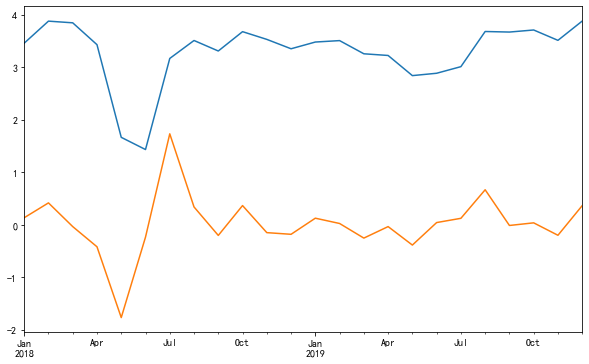

In [17]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['SimHei']    
plt.rcParams['axes.unicode_minus'] = False      
ii["NPP"][144:168].plot()
ii["NPP"].diff(1)[144:168].plot()

d:\ana\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


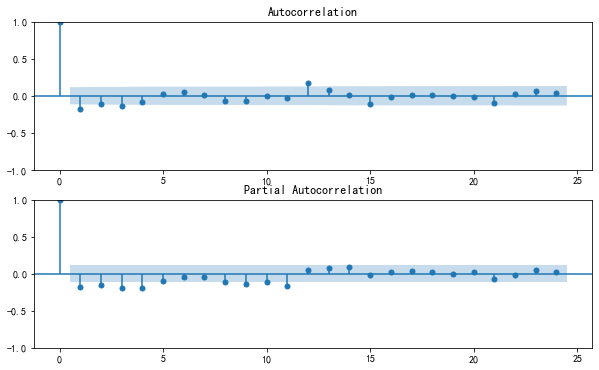

In [18]:
#ARIMA模型分析：
#ACF and PACF graph
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ii["NPP"].diff(1).iloc[1:].dropna(),lags=24,ax=ax1) # 注意：要去掉第1个空值                             
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ii["NPP"].diff(1).iloc[1:].dropna(),  lags=24,ax=ax2)# 注意：要去掉第1个空值



In [19]:
# ADF test for the stationary 
temp = np.array(ii["NPP"].diff(1).iloc[1:])
t = adfuller(temp)  
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output


,value
Test Statistic Value,-8.847501
p-value,0.0
Lags Used,10
Number of Observations Used,276
Critical Value(1%),-3.454267
Critical Value(5%),-2.87207
Critical Value(10%),-2.572381


In [20]:
# white noise test for the data to find whether the data is meaningful 
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(ii["NPP"].diff(1).iloc[1:], lags=1)) 
# the lower p-value means that we reject the H0 which is the data is white noise

    lb_stat  lb_pvalue
1  9.488039   0.002068


In [21]:
from scipy import linalg
print(linalg.lapack.dgetrf([np.nan]))
print(linalg.lapack.dgetrf([np.inf]))

(array([nan]), array([0], dtype=int32), 0)
(array([inf]), array([0], dtype=int32), 0)


In [22]:
sm.tsa.arima.ARIMA(ii["NPP"], order =(1, 1, 1)).fit().bic

d:\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


343.53449775758025

In [38]:
# find q and p
pmax = int(len(ii["NPP"].diff(1).iloc[1:]) / 20)    #normally q and p will no greater than  length /10
qmax = int(len(ii["NPP"].diff(1).iloc[1:]) / 20)
bic_matrix = []
for p in range(pmax +1):
    temp= []
    for q in range(qmax+1):
        try:
            temp.append(sm.tsa.arima.ARIMA(ii["NPP"], order =(p, 1, q)).fit().bic)
        except:
            temp.append(None)
        bic_matrix.append(temp)

# ARIMA(ii["NPP"].diff(1).iloc[1:],order =  (p, 1, q)).fit().bic
bic_matrix = pd.DataFrame(bic_matrix)
bic_matrix.fillna(bic_matrix.max(),inplace=True)   
p,q = bic_matrix.stack().idxmin()   
print(u'q and p with minmument BIC：%s,%s' %(p,q))  #  use BIC to find the best q and p 



d:\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\ana\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive paramete

q and p with minmument BIC：15,1


d:\ana\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
ii["NPP"]

2006-01-31    0.000000
2006-02-28    0.000000
2006-03-31    0.000000
2006-04-30    0.000000
2006-05-31    0.000000
                ...   
2029-08-31    3.329144
2029-09-30    3.518151
2029-10-31    3.586795
2029-11-30    3.286577
2029-12-31    3.174694
Freq: M, Name: NPP, Length: 288, dtype: float64

d:\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\ana\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


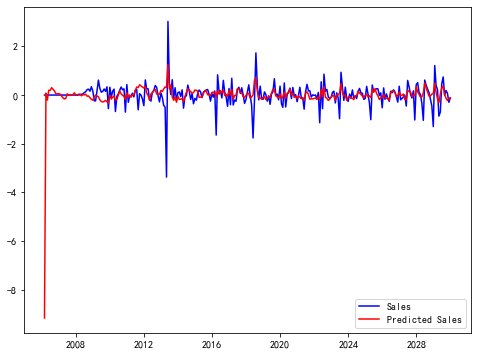

In [63]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import numpy as np
#建立ARIMA模型
model=ARIMA(ii["NPP"].diff(1).iloc[1:].dropna(),order = (0,1,4),exog=ii.iloc[1:, ii.columns != "NPP"].values).fit() #使用最小二乘，‘mle’是极大似然估计
#画图比较一下预测值和真实观测值之间的关系
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(ii["NPP"].diff(1).iloc[1:],color='blue',label='Sales')
ax.plot(model.fittedvalues,color='red',label='Predicted Sales')
plt.legend(loc='lower right')



In [68]:
# 模型参数估计及检验：
model=ARIMA(ii["NPP"].diff(1).iloc[1:].dropna(),order =(0,1,4),exog=ii.iloc[1:, ii.columns != "NPP"].values).fit() #使用最小二乘，‘mle’是极大似然估计
params=model.params
tvalues=model.tvalues
pvalues=model.pvalues
result_mat=pd.DataFrame({'Estimate':params,'t-values':tvalues,'pvalues':pvalues})
print(result_mat)  # 注意：这里得到的是-θ的结果（Xt=at-θ1a(t-1)-θ2a(t-2)）。从t值来看是显著的。
    
print('AIC is '+str(model.aic))
print('estimator of variance：%f' %model.sigma2)


d:\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


           Estimate   t-values        pvalues
x1        -0.028979  -0.977508   3.283178e-01
x2        -0.013224  -1.298229   1.942085e-01
x3        -0.003131  -1.164638   2.441656e-01
x4     -3160.703605  -1.937856   5.264085e-02
ma.L1     -1.292236 -27.590265  1.456145e-167
ma.L2      0.131830   1.308160   1.908189e-01
ma.L3      0.021413   0.184199   8.538574e-01
ma.L4      0.141433   1.825903   6.786486e-02
sigma2     0.173766  22.705480  3.954962e-114
AIC is 336.51118742806455


d:\ana\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AttributeError: 'ARIMAResults' object has no attribute 'sigma2'

In [70]:
model = ARIMA(ii["NPP"].diff(1).iloc[1:].dropna(),exog=ii.iloc[1:, ii.columns != "NPP"].values,order = (0,1,4)).fit()
model.summary()        


d:\ana\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\ana\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    NPP   No. Observations:                  287
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -159.256
Date:                Mon, 19 Sep 2022   AIC                            336.511
Time:                        13:08:54   BIC                            369.415
Sample:                    02-28-2006   HQIC                           349.700
                         - 12-31-2029                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0290      0.030     -0.978      0.328      -0.087       0.029
x2            -0.0132      0.010     -1.298      0.194      -0.033       0.007
x3            -0.0031      0.003     -1.165      0.244      -0.008       0.002
x4         -3160.7036   1631.032     -1.938      0.053   -6357.467      36.060
ma.L1         -1.2922      0.047    -27.590      0.000      -1.384      -1.200
ma.L2          0.1318      0.101      1.308      0.191      -0.066       0.329
ma.L3          0.0214      0.116      0.184      0.854      -0.206       0.249
ma.L4          0.1414      0.077      1.826      0.068      -0.010       0.293
sigma2         0.1738      0.008     22.705      0.000       0.159       0.189
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              6391.90
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -2.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
predictions_ARIMA_diff = pd.Series(model.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())


2006-02-28   -9.168900
2006-03-31    0.082446
2006-04-30   -0.208560
2006-05-31    0.198415
2006-06-30    0.193964
Freq: M, dtype: float64


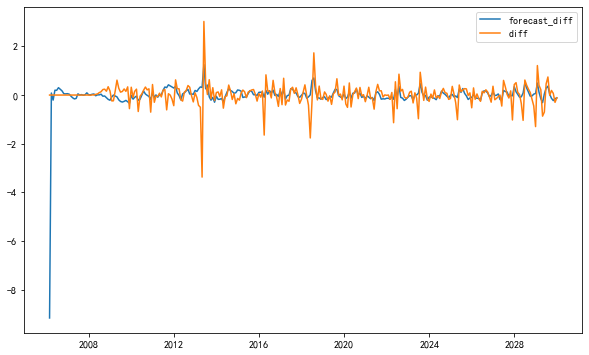

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(predictions_ARIMA_diff,label="forecast_diff")
plt.plot(ii["NPP"].diff(1).iloc[1:],label="diff")
plt.legend()
plt.show()


In [76]:
predictions = [i + j for i, j in zip(list(predictions_ARIMA_diff), list(ii['NPP'])[1:])]
prediction_sales = {
    "date":ii["NPP"].diff(1).index[1:],
    "NPP":predictions
}
prediction_sales = pd.DataFrame(prediction_sales)
prediction_sales['date'] = pd.to_datetime(prediction_sales['date']) 
#df[''date]数据类型为“object”，通过pd.to_datetime将该列数据转换为时间类型，即datetime。 
prediction_sales = prediction_sales.set_index(['date'], drop=True)    
#将日期设置为索引
prediction_sales.head()


,NPP
date,
2006-02-28,-9.168900
2006-03-31,0.082446
2006-04-30,-0.208560
2006-05-31,0.198415
2006-06-30,0.193964


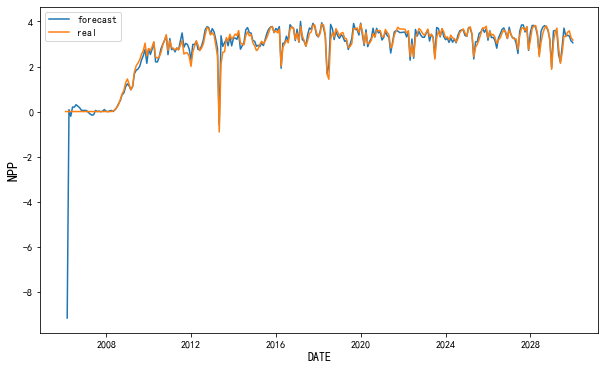

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(prediction_sales,label="forecast")
plt.plot(ii['NPP'],label="real")
plt.xlabel('DATE',fontsize=12,verticalalignment='top')
plt.ylabel('NPP',fontsize=14,horizontalalignment='center')
plt.legend()
plt.show()



              AC         Q  Prob(>Q)
to lag                              
6.0    -0.002437  0.294595  0.999523
12.0    0.034458  1.013412  0.999985
18.0    0.018622  1.795921  1.000000
24.0   -0.022484  2.264041  1.000000


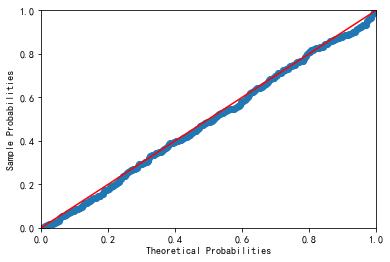

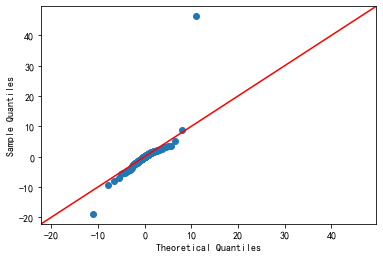

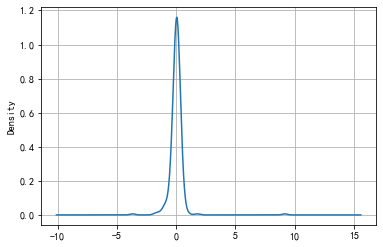

In [93]:
# 如果ARMA模型估计的好，应当使得估计值后的残差项是白噪声。下面对模型的残差项进行白噪声检验：
resid=model.resid
r,q,p=sm.tsa.acf(resid.values.squeeze(),qstat=True)
mat_res=np.c_[range(1,25),r[1:],q,p] #np.c_是按行连接两个矩阵，把两矩阵左右相加，要求行数相等，类似pandas的merge()
table=pd.DataFrame(mat_res,columns=['to lag','AC','Q','Prob(>Q)'])
LB_result_res=table.iloc[[5,11,17,23]]
LB_result_res.set_index('to lag',inplace=True)
print(LB_result_res)
## high prob means that we do not reject H0 which is resid is white noise means the model is good 

# pp plot
import scipy.stats as stats
sm.ProbPlot(resid, stats.t,fit=True).ppplot(line='45')
sm.ProbPlot(resid, stats.t,fit=True).qqplot(line='45')
plt.show()
#qq polt
plt.figure()
x=pd.Series(resid)
p1=x.plot(kind='kde')   
# p2=x.hist(normed=True)
plt.grid(True)
plt.show()


In [94]:
NPP_dataframe = pd.DataFrame()
for i in static_data_non_multi.itertuples():
    location = tuple(i[1:])
    npp_tmp = output_data[location]['NPP']
    NPP_dataframe[location] = npp_tmp


C:\Users\new\AppData\Local\Temp\ipykernel_27132\3662699431.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  npp_tmp = output_data[location]['NPP']
C:\Users\new\AppData\Local\Temp\ipykernel_27132\3662699431.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  npp_tmp = output_data[location]['NPP']
C:\Users\new\AppData\Local\Temp\ipykernel_27132\3662699431.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  npp_tmp = output_data[location]['NPP']
C:\Users\new\AppData\Local\Temp\ipykernel_27132\3662699431.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  npp_tmp = output_data[location]['NPP']
C:\Users\new\AppData\Local\Temp\ipykernel_27132\3662699431.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  npp_tmp = output_data[location]['NPP']
C:\Users\new\AppData\Local\Temp\ipykernel_27132\3662699431.py:4: PerformanceWarning: indexing past lexsort dep

In [ ]:
NPP_dataframe.dropna(axis=1,inplace=True)

In [ ]:
NPP_dataframe

,"(1.0, 5.25, -77.25, 66.0, 0.11999999731779099)","(1.0, 5.25, -76.75, 201.0, 0.07500000298023224)","(1.0, 5.25, -76.25, 1210.0, 0.05999999865889549)","(1.0, 5.25, -75.75, 1552.0, 0.05999999865889549)","(1.0, 5.25, -75.25, 2236.0, 0.11999999731779099)","(1.0, 5.25, -74.75, 692.0, 0.05999999865889549)","(1.0, 5.25, -74.25, 1787.0, 0.05999999865889549)","(1.0, 5.25, -73.75, 2840.0, 0.11999999731779099)","(1.0, 5.25, -73.25, 2381.0, 0.11999999731779099)","(1.0, 5.25, -72.75, 1578.0, 0.11999999731779099)",...,"(1.0, -19.75, -54.75, 392.0, 0.07500000298023224)","(1.0, -19.75, -54.25, 493.0, 0.05999999865889549)","(1.0, -19.75, -53.75, 491.0, 0.05999999865889549)","(1.0, -19.75, -53.25, 427.0, 0.05999999865889549)","(1.0, -19.75, -52.75, 415.0, 0.05999999865889549)","(1.0, -19.75, -52.25, 370.0, 0.05999999865889549)","(1.0, -19.75, -51.75, 494.0, 0.05999999865889549)","(1.0, -19.75, -51.25, 423.0, 0.05999999865889549)","(1.0, -19.75, -50.75, 391.0, 0.07500000298023224)","(1.0, -19.75, -50.25, 421.0, 0.07500000298023224)"
2006-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-04-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-05-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029-08-31,3.291519,3.294561,3.264975,3.563239,3.591723,3.594246,3.565993,3.247660,3.247660,3.247660,...,2.594296,2.021400,2.021400,1.596871,1.527492,1.527492,1.496395,0.881945,0.985850,0.985850
2029-09-30,3.059875,3.081914,3.061412,2.901414,2.881743,2.884459,2.933185,3.210487,3.210487,3.210487,...,2.141714,1.548932,1.548932,1.312416,1.409160,1.409160,1.363341,0.851891,0.801262,0.801262
2029-10-31,2.419453,2.471952,2.464318,2.831827,2.891342,2.890299,2.901047,2.921509,2.921509,2.921509,...,2.791976,3.055145,3.055145,2.398317,2.265505,2.265505,2.138484,1.667929,1.495940,1.495940
2029-11-30,2.554417,2.605659,2.596657,2.455801,2.443594,2.444819,2.526696,3.031039,3.031039,3.031039,...,3.003389,2.818350,2.818350,3.079339,3.153937,3.153937,3.189953,2.992254,3.435606,3.435606


In [ ]:
  from pySTARMA import starma_model as sm
  
  #Create instance of STARMA
  model = sm.STARMA(5, 2, time_series, wa_matrices, 3)
  
  #Estimate parameters
  model.fit()

  #Print explicit item 
  print(model.get_item('bic'))

NameError: name 'time_series' is not defined